In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
datadir='/home/shashimal/Documents/dataset'
categories = ['dyed-lifted-polyps','dyed-resection-margins','esophagitis',
             'normal-cecum','normal-pylorus','normal-z-line','polyps','ulcerative-colitis']

In [3]:
training_data=[]
def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(96,96))
#                 crop_array = new_array[0:96,35:96]
                training_data.append([new_array,class_num])
            except Exception as e:    
                pass
create_training_data() 

In [4]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(8000,96,96,3)
x.shape

(8000, 96, 96, 3)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 8)
y_test = tf.keras.utils.to_categorical(y_test, 8)

In [13]:

model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (96, 96, 3))
# model2= applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape = (96, 96, 3))

In [18]:
for layer in model.layers:
    layer.trainable = False
x = model.output
x =  tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(1024, activation="relu")(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(8, activation="softmax")(x)   
model_final = tf.keras.models.Model(model.input,predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.001, momentum=0.9), metrics=["accuracy"])

    

In [19]:
history=model_final.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 562s 88ms/sample - loss: 1.4461 - acc: 0.4631 - val_loss: 1.0945 - val_acc: 0.5694
Epoch 2/20
6400/6400 [==============================] - 554s 87ms/sample - loss: 0.9706 - acc: 0.6252 - val_loss: 0.8911 - val_acc: 0.6625
Epoch 3/20
6400/6400 [==============================] - 552s 86ms/sample - loss: 0.8654 - acc: 0.6602 - val_loss: 0.8264 - val_acc: 0.6794
Epoch 4/20
6400/6400 [==============================] - 564s 88ms/sample - loss: 0.8098 - acc: 0.6845 - val_loss: 0.7870 - val_acc: 0.6931
Epoch 5/20
6400/6400 [==============================] - 555s 87ms/sample - loss: 0.7648 - acc: 0.7020 - val_loss: 0.7555 - val_acc: 0.7063
Epoch 6/20
6400/6400 [==============================] - 25083s 4s/sample - loss: 0.7413 - acc: 0.7109 - val_loss: 0.7468 - val_acc: 0.7056
Epoch 7/20
6400/6400 [==============================] - 635s 99ms/sample - loss: 0.7151 - acc: 0.7225 - val_loss: 0.72

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [21]:
score = model_final.evaluate(x_test, y_test, verbose=0)

In [22]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.626891587972641
Test accuracy: 0.74


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


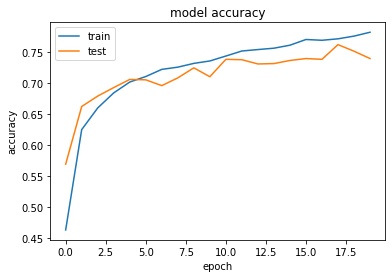

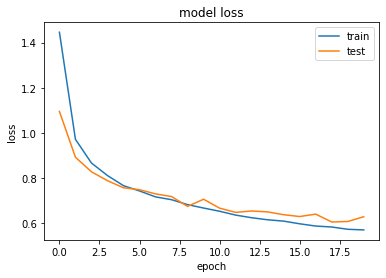

In [23]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [30]:
predictions=model_final.predict(x_test)
predictions[10]

array([1.7406090e-01, 8.2465869e-01, 7.4679956e-05, 6.4581633e-05,
       3.0395921e-04, 3.3695229e-05, 7.4848841e-04, 5.4951608e-05],
      dtype=float32)

In [31]:
import numpy as np
np.argmax(predictions[10])

1

In [32]:
y_test[10]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)